In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('breast.csv')

In [3]:
df

,id_number,outcome,Time,redius_mean,texture_mean,perimeter_mean,are_mean,smoothness_mean,comoactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst,Tumor_size,Lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_number                198 non-null    int64  
 1   outcome                  198 non-null    object 
 2   Time                     198 non-null    int64  
 3   redius_mean              198 non-null    float64
 4   texture_mean             198 non-null    float64
 5   perimeter_mean           198 non-null    float64
 6   are_mean                 198 non-null    float64
 7   smoothness_mean          198 non-null    float64
 8   comoactness_mean         198 non-null    float64
 9   concavity_mean           198 non-null    float64
 10  concave_point_mean       198 non-null    float64
 11  symmetry_mean            198 non-null    float64
 12  fractal_dimension_mean   198 non-null    float64
 13  radius_se                198 non-null    float64
 14  texture_se               1

In [5]:
df['outcome'].replace({'N':'0', 'R':'1'},inplace=True)

In [6]:
df

,id_number,outcome,Time,redius_mean,texture_mean,perimeter_mean,are_mean,smoothness_mean,comoactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst,Tumor_size,Lymph_node_status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,943471,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,94547,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0
196,947204,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN


# Fill up Missing value by mean

In [7]:
df.Lymph_node_status

0      5.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
193    2.0
194    0.0
195    0.0
196    NaN
197    0.0
Name: Lymph_node_status, Length: 198, dtype: float64

In [8]:
missing_value_mean= df.Lymph_node_status.mean()

In [9]:
missing_value_mean

3.211340206185567

In [10]:
fill_missing_value= df.Lymph_node_status.fillna(missing_value_mean)

In [11]:
fill_missing_value

0      5.00000
1      2.00000
2      0.00000
3      0.00000
4      0.00000
        ...   
193    2.00000
194    0.00000
195    0.00000
196    3.21134
197    0.00000
Name: Lymph_node_status, Length: 198, dtype: float64

In [12]:
df.Lymph_node_status= fill_missing_value

In [13]:
df

,id_number,outcome,Time,redius_mean,texture_mean,perimeter_mean,are_mean,smoothness_mean,comoactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst,Tumor_size,Lymph_node_status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.00000
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.00000
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.00000
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.00000
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.00000
194,943471,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.00000
195,94547,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.00000
196,947204,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,3.21134


In [14]:
df.describe()

,id_number,Time,redius_mean,texture_mean,perimeter_mean,are_mean,smoothness_mean,comoactness_mean,concavity_mean,concave_point_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst,Tumor_size,Lymph_node_status
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.211340
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.423363
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


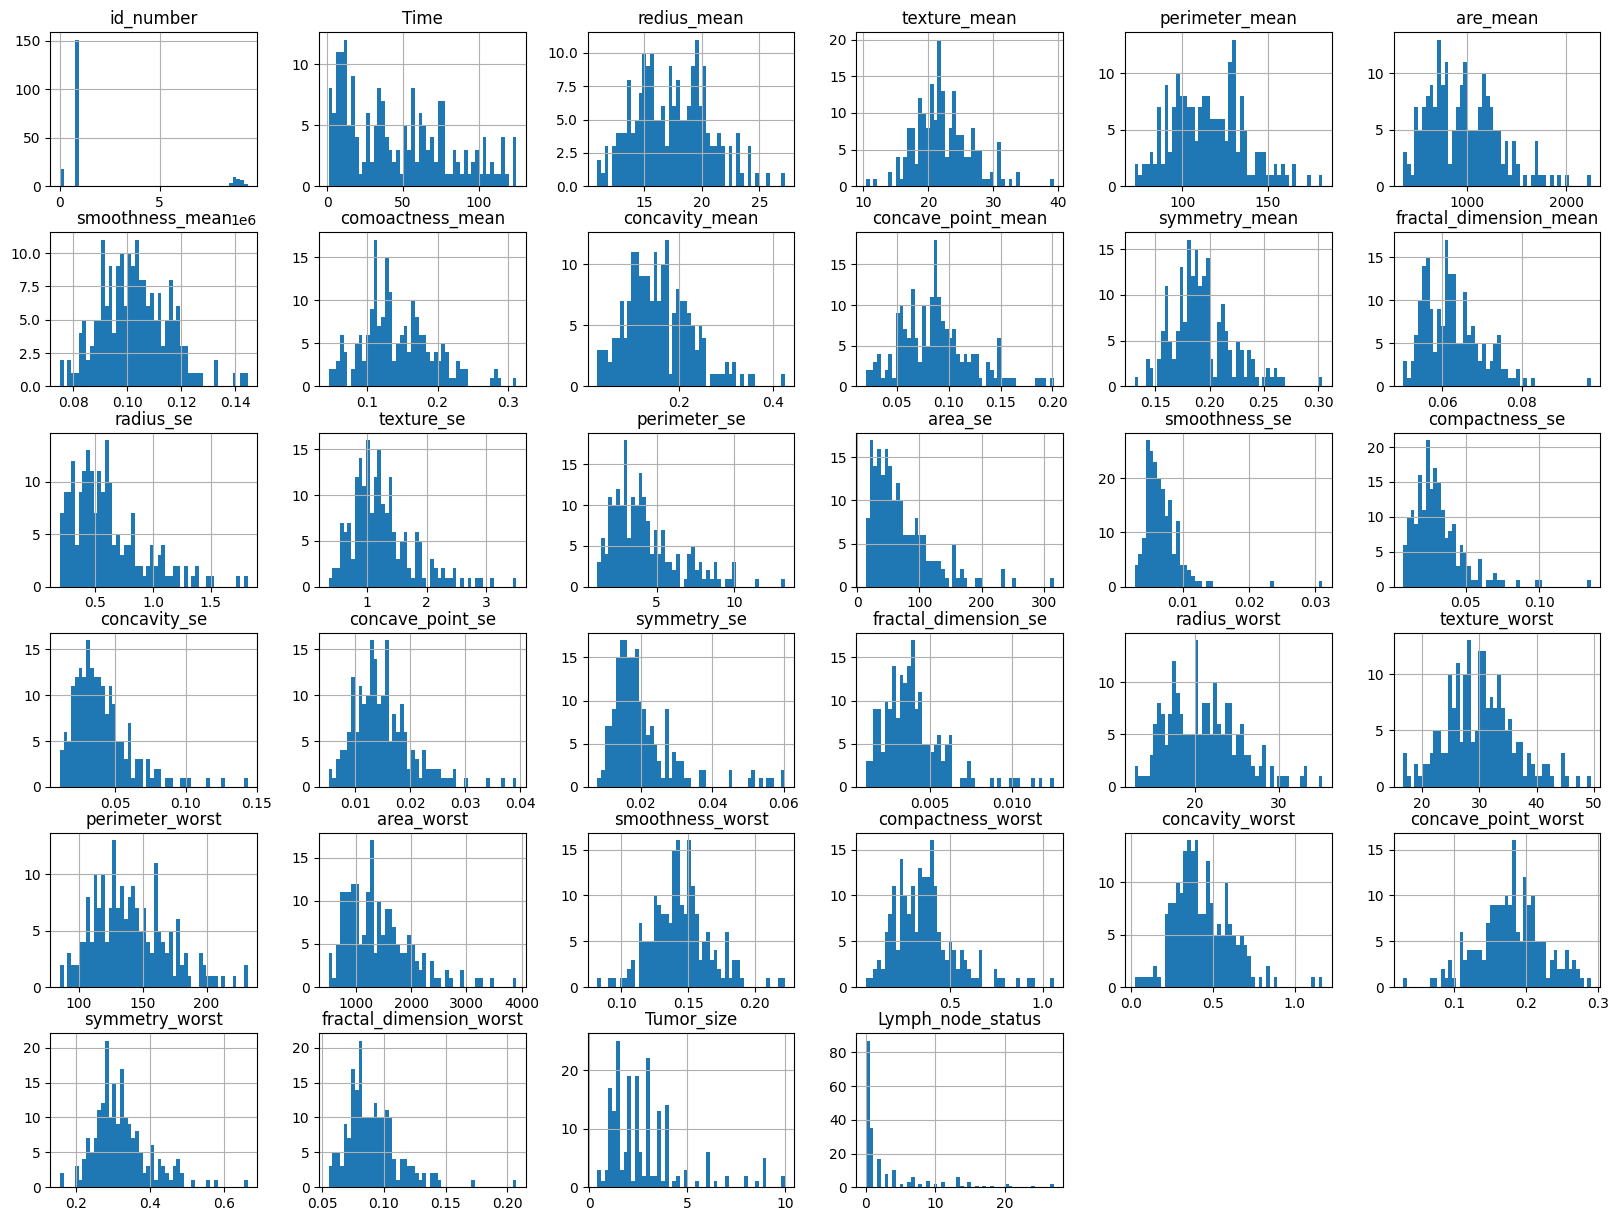

In [15]:
df.hist(bins=50,figsize=(20,15))
plt.show()


# Drop Id Number

In [16]:
df.drop('id_number',axis=1,inplace=True)

In [17]:
df

,outcome,Time,redius_mean,texture_mean,perimeter_mean,are_mean,smoothness_mean,comoactness_mean,concavity_mean,concave_point_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst,Tumor_size,Lymph_node_status
0,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.00000
1,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.00000
2,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.00000
3,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.00000
4,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.00000
194,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.00000
195,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.00000
196,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,3.21134


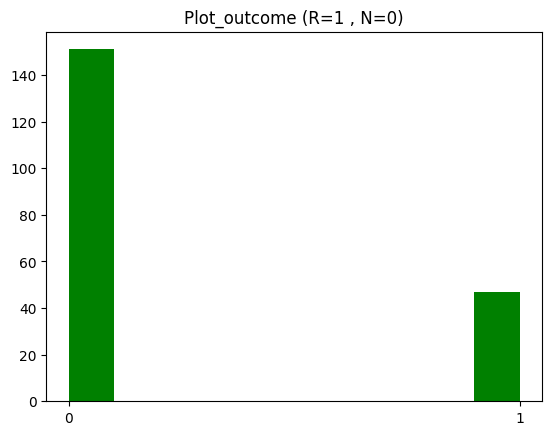

In [18]:
plt.hist(df['outcome'], color='g')
plt.title('Plot_outcome (R=1 , N=0)')
plt.show()

In [19]:
df.corr()

,outcome,Time,redius_mean,texture_mean,perimeter_mean,are_mean,smoothness_mean,comoactness_mean,concavity_mean,concave_point_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst,Tumor_size,Lymph_node_status
outcome,1.000000,-0.351326,0.174124,-0.064295,0.176486,0.189893,0.020778,0.000798,0.054893,0.118224,...,0.231998,0.235310,0.038520,-0.020067,0.017621,0.074345,-0.074731,-0.055170,0.177273,0.167377
Time,-0.351326,1.000000,-0.344722,-0.264671,-0.346080,-0.344031,0.164793,0.010000,-0.139475,-0.171841,...,-0.280596,-0.253930,0.212769,0.120516,0.009546,-0.026541,0.247678,0.288715,-0.133355,-0.125976
redius_mean,0.174124,-0.344722,1.000000,0.143456,0.995933,0.992855,-0.158239,0.159017,0.469518,0.664010,...,0.915053,0.891489,-0.372894,-0.150712,0.038952,0.357869,-0.232142,-0.414340,0.172102,0.066441
texture_mean,-0.064295,-0.264671,0.143456,1.000000,0.142033,0.140440,-0.192262,-0.039803,0.037165,0.006687,...,0.123674,0.117467,-0.113308,-0.006467,0.013635,-0.069921,-0.186850,-0.085847,0.027073,0.042438
perimeter_mean,0.176486,-0.346080,0.995933,0.142033,1.000000,0.990699,-0.102912,0.236721,0.533194,0.712766,...,0.923659,0.889344,-0.331667,-0.092041,0.096790,0.410000,-0.206949,-0.364022,0.166489,0.067700
are_mean,0.189893,-0.344031,0.992855,0.140440,0.990699,1.000000,-0.141470,0.163176,0.475862,0.667530,...,0.925335,0.914166,-0.345111,-0.141358,0.046641,0.365026,-0.234294,-0.395026,0.174491,0.067557
smoothness_mean,0.020778,0.164793,-0.158239,-0.192262,-0.102912,-0.141470,1.000000,0.666559,0.623867,0.545734,...,-0.064664,-0.106691,0.745400,0.447849,0.499438,0.531015,0.308964,0.535751,-0.084376,0.024291
comoactness_mean,0.000798,0.010000,0.159017,-0.039803,0.236721,0.163176,0.666559,1.000000,0.836015,0.716438,...,0.276994,0.168275,0.452067,0.764824,0.743333,0.761044,0.429953,0.611315,-0.060199,0.002742
concavity_mean,0.054893,-0.139475,0.469518,0.037165,0.533194,0.475862,0.623867,0.836015,1.000000,0.909990,...,0.514336,0.421021,0.319247,0.483300,0.702673,0.767571,0.212976,0.302868,-0.010244,0.059668
concave_point_mean,0.118224,-0.171841,0.664010,0.006687,0.712766,0.667530,0.545734,0.716438,0.909990,1.000000,...,0.682749,0.604029,0.174917,0.286599,0.471429,0.764803,0.089804,0.101327,0.050040,0.055983


<Axes: >

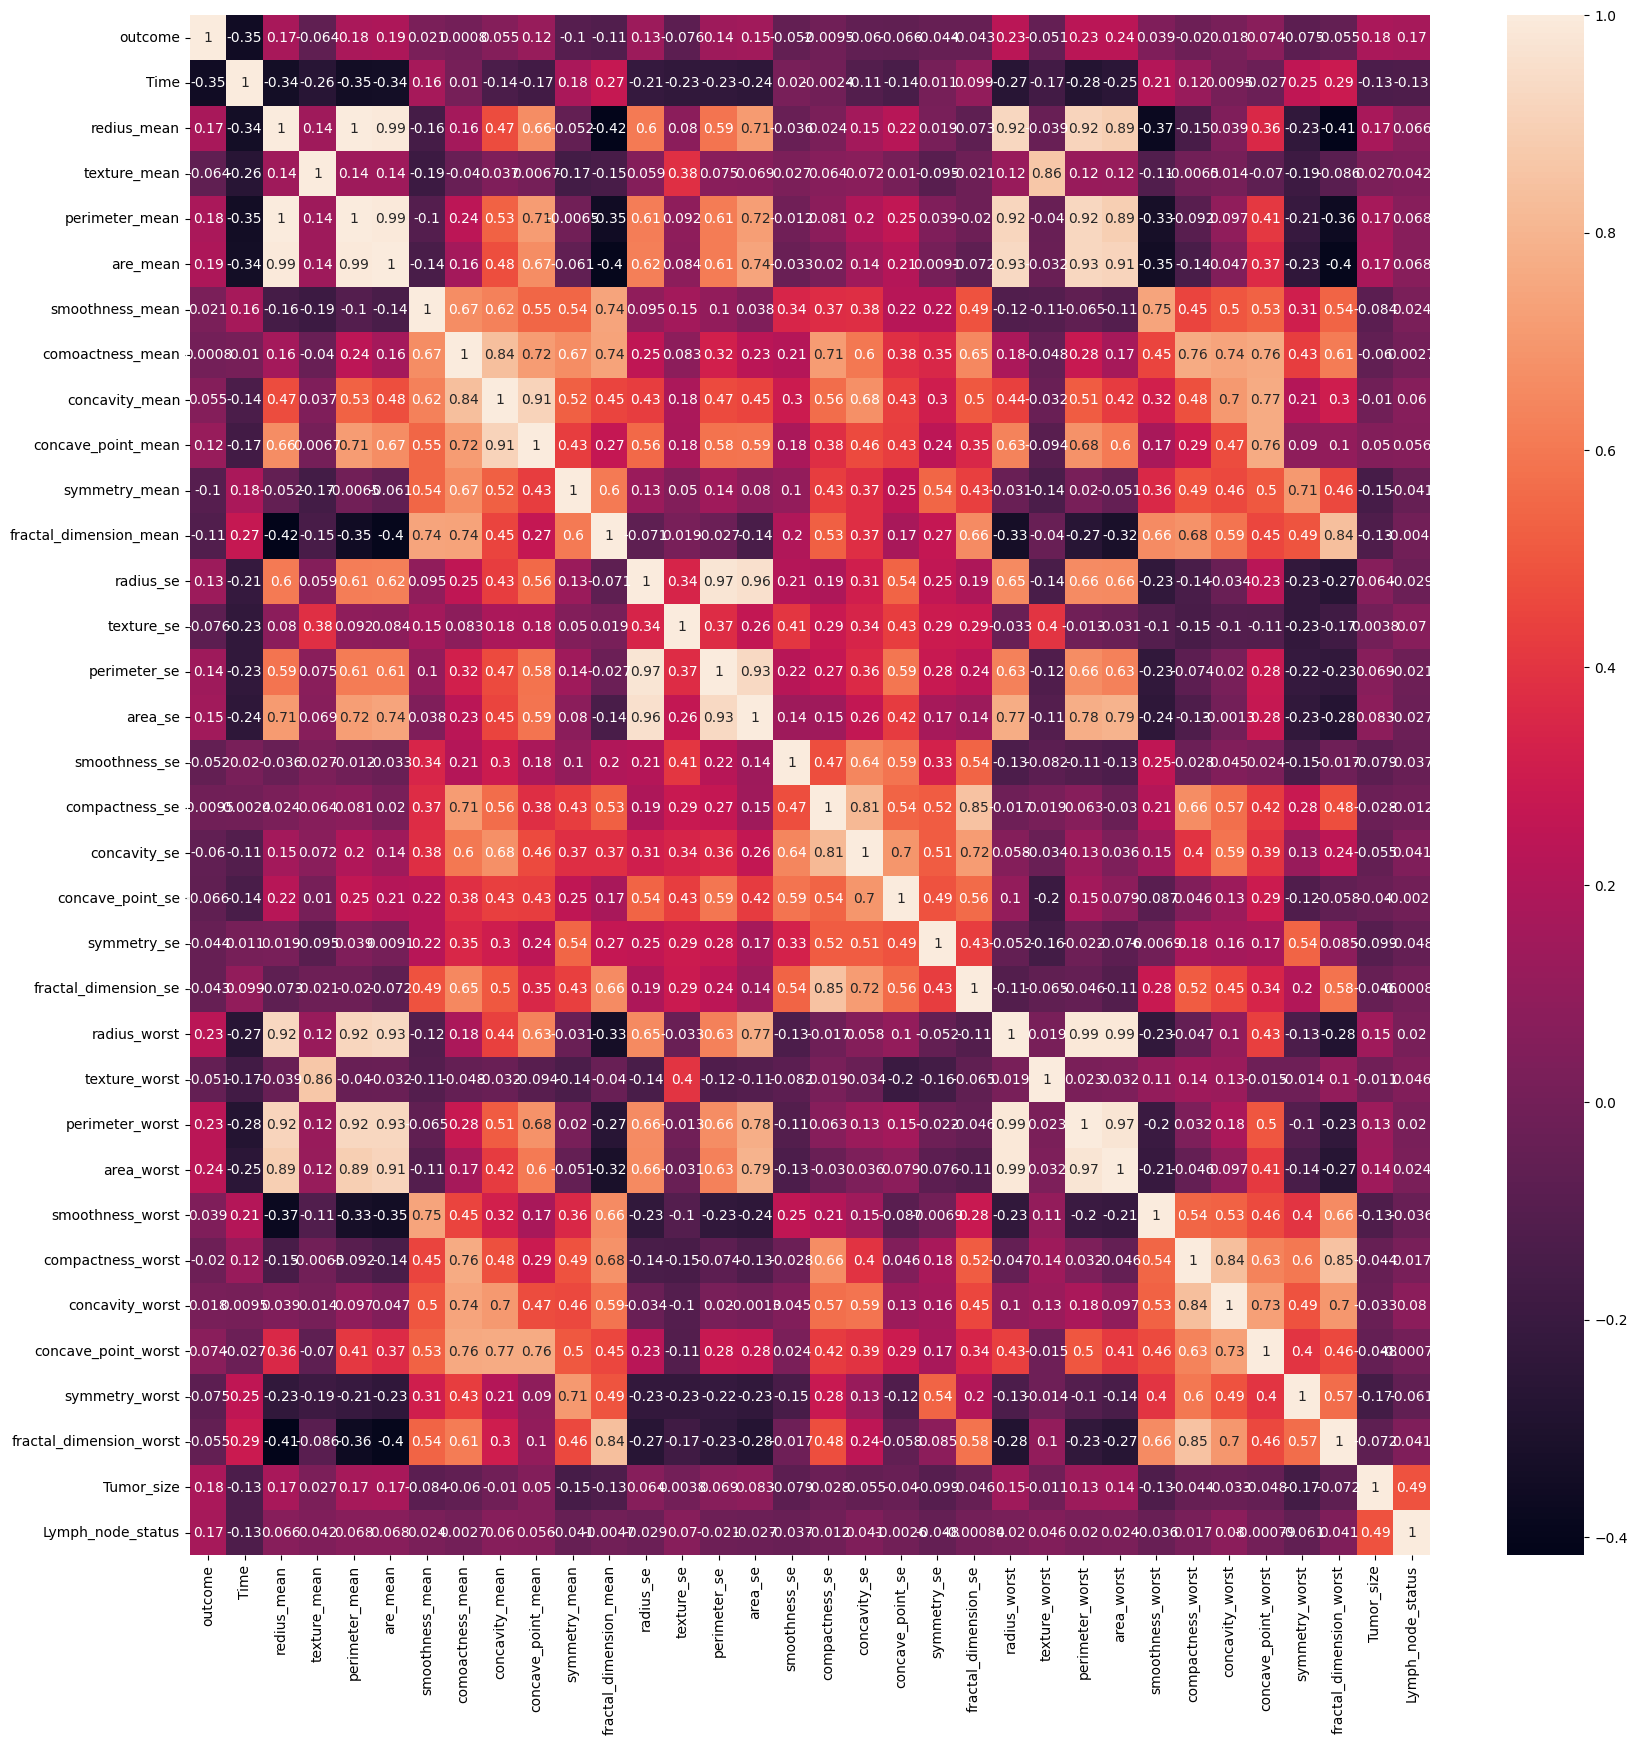

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

# Building Model

In [21]:
X=df.drop(['outcome'],axis=1)
y = df['outcome']

In [22]:
X

,Time,redius_mean,texture_mean,perimeter_mean,are_mean,smoothness_mean,comoactness_mean,concavity_mean,concave_point_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst,Tumor_size,Lymph_node_status
0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.00000
1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.00000
2,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.00000
3,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.00000
4,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.00000
194,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.00000
195,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.00000
196,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,3.21134


In [23]:
y

0      0
1      0
2      0
3      0
4      1
      ..
193    0
194    0
195    0
196    1
197    0
Name: outcome, Length: 198, dtype: object

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [26]:
X_train


,Time,redius_mean,texture_mean,perimeter_mean,are_mean,smoothness_mean,comoactness_mean,concavity_mean,concave_point_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_point_worst,symmetry_worst,fractal_dimension_worst,Tumor_size,Lymph_node_status
195,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,132.5,1295.0,0.1261,0.1572,0.2141,0.0952,0.3362,0.06033,3.7,0.0
20,103,14.58,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,...,122.4,896.9,0.1525,0.6643,0.5539,0.2701,0.4264,0.12750,2.5,0.0
160,34,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,106.0,788.0,0.1794,0.3966,0.3381,0.1521,0.3651,0.11830,1.0,0.0
169,17,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,1.5,0.0
7,77,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,13,15.78,17.10,102.20,769.0,0.09668,0.09030,0.07268,0.04475,0.1890,...,111.7,921.4,0.1386,0.2640,0.2901,0.1234,0.3261,0.07752,0.8,0.0
176,14,17.53,25.28,114.00,966.6,0.09278,0.09175,0.11050,0.06741,0.1424,...,142.6,1483.0,0.1287,0.2472,0.2753,0.1372,0.2404,0.07156,10.0,9.0
155,14,19.44,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,0.1823,...,153.9,1740.0,0.1514,0.3725,0.5936,0.2060,0.3266,0.09009,7.0,9.0
13,36,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,...,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6.0


In [27]:
y_train

195    0
20     0
160    0
169    0
7      1
      ..
180    0
176    1
155    1
13     1
69     1
Name: outcome, Length: 158, dtype: object

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

# Finding best model for this Dataframe

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression 

In [49]:
lr= LogisticRegression()

In [50]:
model1=lr.fit(X_train,y_train)

In [51]:
pre= model1.predict(X_test)

In [52]:
pre

array(['0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0'], dtype=object)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,pre)

0.875

## LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr1=LinearRegression()

In [38]:
lr1.fit(X_train,y_train)

LinearRegression()

In [39]:
pre2=lr1.predict(X_test)

In [40]:
pre2

array([ 0.22764058,  0.27091868,  0.09627006,  0.11502806, -0.17597062,
        0.54391169,  0.81862719,  0.18704783,  0.18312025, -0.56077422,
        0.48793577, -0.20436287,  0.37422917,  0.08932652,  0.15286712,
        0.43021488,  0.0282313 ,  0.02951394,  0.8358735 ,  0.04810866,
        0.27124697,  0.4571    ,  0.49530761,  0.15304423,  0.33707934,
        0.36107335,  0.4289643 ,  0.20010065,  0.53558834,  0.07704139,
        0.64513286,  0.47957029,  0.51655171,  0.73790886,  0.28001395,
        0.0671291 ,  0.05856329,  0.27989166, -0.66558084,  0.43309772])

In [41]:
#accuracy_score(y_test,pre2)    # We cannot calculate accuracy for a regression model

## DecisionTree

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)


In [43]:
prediction2

array(['1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0',
       '0'], dtype=object)

In [44]:
accuracy_score(y_test,prediction2)

0.65

## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)


In [46]:
prediction3

array(['0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0'], dtype=object)

In [47]:
accuracy_score(y_test, prediction3)

0.825